# Time Series Analysis Project
### Part 5: Clean up and prepare AdSpend data for Granger Causal & Predictive Analysis
### Written By Ali Chen

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from datetime import date
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#Import ad spend data for Hulu
adspend = pd.read_csv('hulu.adspend.csv')

In [3]:
#Remove products from ad spend that are specific TV shows
#that way our data will focus on only PRODUCTS = Hulu : Online, ====
adspend = adspend[adspend.PRODUCT != 'Hulu-Wrong Mans : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Deadbeat : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Awesomes : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-East Los High : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Jack Hannas Wild Countdown : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Soy Tu Duena : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Triunfo Del Amor : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Empire : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Tyrant : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Seinfeld : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Difficult People : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Strain : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Hotwives Of Las Vegas : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Youre The Worst : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Casual : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Manhattan : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Mindy Project : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Awesomes : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-11.22.63 : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Path : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Curious George : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Ocean Mysteries : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-He Named Me Malala : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-SpongeBob Movie Sponge Out Of Water : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Teenage Mutant Ninja Turtles : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Beatles Live At The Hollywood Bowl : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Beatles Eight Days A Week : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Eight Days A Week : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Chance : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Shut Eye : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Handmaids Tale : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Harlots : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Good Behavior : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Future Man : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-I Love You America : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Small Business Revolution : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Marvel Runaways : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Castle Rock : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Hard Sun : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Looming Tower : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Real Announcers Of Studio J : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Superstore : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Minding The Gap : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-American Crime : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Crime & Punishment : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-College Football : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-First : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Main Street : Online']

In [4]:
#Examine first few rows of ad spend data
adspend.head()


,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"WEEK OF OCT 07, 2013 (B)",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"WEEK OF OCT 07, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"WEEK OF OCT 07, 2013 (B)",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"WEEK OF OCT 14, 2013 (B)",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"WEEK OF OCT 14, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(adspend)

395

### Clean up and Remove Text Strings

In [6]:
#Clean up time period column by removing string of text "week of"
#Replace "week of" with nothing (essentially deleting the string)
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF ", "", regex=True)
#Observe changes made below
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013 (B)",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 07, 2013 (B)",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 14, 2013 (B)",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"OCT 14, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Clean up time period column by removing string of text "(B)"
#Replace "(B)" with nothing (essentially deleting the string)
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace(" \(B\)", "", regex=True)
#Observe changes made below
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 07, 2013",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 14, 2013",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"OCT 14, 2013",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Clean up column names by removing string of text "DOLS 000"
#Replace "DOLS 000" with nothing (essentially deleting the string)
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "", regex=True)

In [9]:
#View list of columns in adspend data
list(adspend)

['TIME PERIOD',
 'PRODUCT',
 'TOTAL',
 'NETWORK TV',
 'CABLE TV',
 'SYNDICATION',
 'SPOT TV',
 'MAGAZINES',
 'SUNDAY MAGS',
 'NATL NEWSP',
 'NEWSPAPER',
 'NETWORK RADIO',
 'NAT SPOT RADIO',
 'OUTDOOR']

In [10]:
#Use dtypes function to what type each variable column is in list
adspend.dtypes

TIME PERIOD        object
PRODUCT            object
TOTAL             float64
NETWORK TV        float64
CABLE TV          float64
SYNDICATION       float64
SPOT TV           float64
MAGAZINES         float64
SUNDAY MAGS       float64
NATL NEWSP        float64
NEWSPAPER         float64
NETWORK RADIO     float64
NAT SPOT RADIO    float64
OUTDOOR           float64
dtype: object

In [11]:
#Convert "product" variable to category so that I can use cat.codes
adspend["PRODUCT"] = adspend["PRODUCT"].astype('category')
#Use cat.codes function to encode each product type with unique assigned variable (0-7)
adspend["PRODUCT_TYPE"] = adspend["PRODUCT"].cat.codes
#Convert "product" variable back to object
adspend["PRODUCT"] = adspend["PRODUCT"].astype('object')
#Use dtypes function to what type each variable column is in list
adspend.dtypes

TIME PERIOD        object
PRODUCT            object
TOTAL             float64
NETWORK TV        float64
CABLE TV          float64
SYNDICATION       float64
SPOT TV           float64
MAGAZINES         float64
SUNDAY MAGS       float64
NATL NEWSP        float64
NEWSPAPER         float64
NETWORK RADIO     float64
NAT SPOT RADIO    float64
OUTDOOR           float64
PRODUCT_TYPE         int8
dtype: object

In [12]:
#Use value_counts function to view frequency counts of Product Type
adspend['PRODUCT_TYPE'].value_counts()
#ID   #Count  #PRODUCT_TYPE
#2    240     Hulu : Online
#6     89     Hulu Plus : Online
#7     20     Hulu With Live TV : Online
#5     12     Hulu Online & Hulu Plus Online : Combo
#4     10     Hulu Latino : Online
#3     10     Hulu Advertising Service : Advertising Services
#1      7     Hulu : Mobile App
#0      7     Hulu : Corporate Promotion

2    240
6     89
7     20
5     12
4     10
3     10
1      7
0      7
Name: PRODUCT_TYPE, dtype: int64

In [13]:
#Create new time variable for "fixed time"
#Pandas will read our cleaned up "time period" column as a date
adspend['FIXED TIME']= pd.to_datetime(adspend['TIME PERIOD'])

adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR,PRODUCT_TYPE,FIXED TIME
0,"OCT 07, 2013",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2013-10-07
1,"OCT 07, 2013",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2013-10-07
2,"OCT 07, 2013",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2013-10-07
3,"OCT 14, 2013",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2013-10-14
4,"OCT 14, 2013",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2013-10-14


In [14]:
#Create new dataframe for adspend with no products
#Pivot table to sum together weekly ad spend across several products for one week
adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)

In [15]:
#View list of columns in dataframe for adspend with no products 
list(adspendnoproducts)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'PRODUCT_TYPE',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL']

In [16]:
#View index for dataframe adspend with no products
#There are 260 rows of data in this dataframe
#1 cummulative entry per week
adspendnoproducts.index

DatetimeIndex(['2013-10-07', '2013-10-14', '2013-10-21', '2013-10-28',
               '2013-11-04', '2013-11-11', '2013-11-18', '2013-11-25',
               '2013-12-02', '2013-12-09',
               ...
               '2018-07-30', '2018-08-06', '2018-08-13', '2018-08-20',
               '2018-08-27', '2018-09-03', '2018-09-10', '2018-09-17',
               '2018-09-24', '2018-10-01'],
              dtype='datetime64[ns]', name='FIXED TIME', length=260, freq=None)

### Plot Ad Spend: Cable TV, Newspaper, Spot TV, and Total

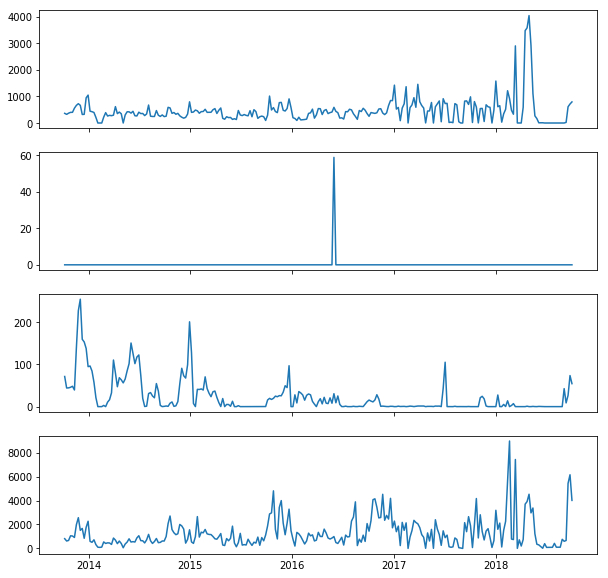

In [17]:
#Set up graph for larger view
dimensions = (10,10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex='all')
#Plot 4 subplots for adspend with no products: Cable TV, Newspaper, Spot TV, Total
ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV'])
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])

In [18]:
#Run test date to see what day of the week the date entry is
#weekday = 0 (Monday)
testdate = pd.to_datetime("2013-10-07")
testdate.weekday()

0

In [19]:
#Import Google Trends data for Hulu and parse dates
hulu = pd.read_csv('hulu.googletrends.csv', parse_dates = ['period'])

In [20]:
#Set index for Hulu data with period
#Index is shaded in bold in head() view
hulu.set_index('period', inplace=True)

hulu.head()

,Unnamed: 0,date,value,onedifvalue
period,,,,
2013-10-07,0,Oct 07 2013,8315.286004,NaN
2013-10-08,1,Oct 08 2013,4946.639643,-3368.646360
2013-10-09,2,Oct 09 2013,4251.535654,-695.103989
2013-10-10,3,Oct 10 2013,7202.183136,2950.647481
2013-10-11,4,Oct 11 2013,7357.478661,155.295525


In [21]:
#Use resample function to resample the data
#Ensures "week of" data will begin at the start of the week (Monday)

#W = week 
#MON = Monday (week will start on Monday)
huluweekly = hulu.resample('W-MON', closed='left', label='left').mean()
hulu.head()

,Unnamed: 0,date,value,onedifvalue
period,,,,
2013-10-07,0,Oct 07 2013,8315.286004,NaN
2013-10-08,1,Oct 08 2013,4946.639643,-3368.646360
2013-10-09,2,Oct 09 2013,4251.535654,-695.103989
2013-10-10,3,Oct 10 2013,7202.183136,2950.647481
2013-10-11,4,Oct 11 2013,7357.478661,155.295525


In [22]:
#Merge weekly data with dataframe adspend with no products
mergedweeklydata = adspendnoproducts.join(huluweekly)

mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,PRODUCT_TYPE,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onedifvalue
FIXED TIME,,,,,,,,,,,,,,,,
2013-10-07,363.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,71.5,0.0,379.9,815.2,3,7106.318305,-279.902227
2013-10-14,325.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,44.2,0.0,250.5,619.8,10,5504.757506,297.620141
2013-10-21,369.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,44.5,0.0,253.9,668.3,17,5532.372752,-311.716903
2013-10-28,400.6,0.0,0.0,0.0,1.7,0.0,0.0,462.5,13,45.9,0.0,143.3,1054.0,24,6133.050943,369.302342
2013-11-04,402.3,0.0,0.0,0.0,4.0,430.8,0.0,0.0,13,48.3,0.0,152.6,1038.0,31,6275.769677,-333.158293


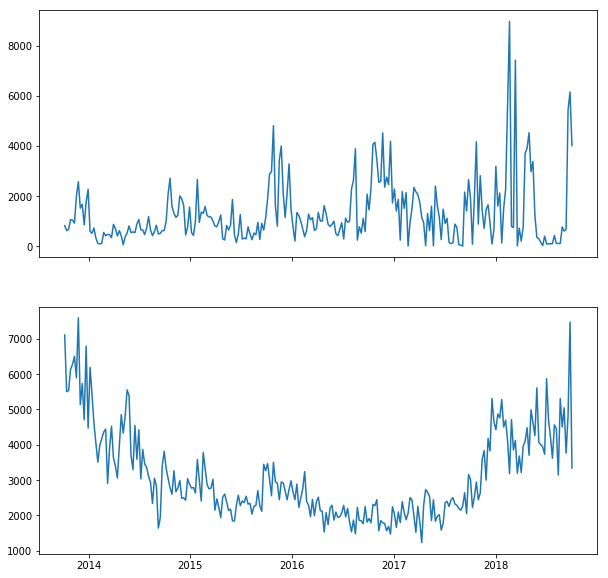

In [23]:
#Set up graph for larger view
dimensions = (10,10)

fig, (ax1, ax2)= pyplot.subplots(2, figsize=dimensions, sharex='all')
#Plot 2 subplots: Total and Value for weekly data
ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax2.plot(mergedweeklydata.index, mergedweeklydata['value'])

### Correlations in Weekly Data

In [24]:
#Correlation between Total and Value of weekly data
mergedweeklydata['TOTAL'].corr(mergedweeklydata['value'])

#Correlation = -0.01926526693090396

0.014855437018776894

In [25]:
#Create one period (day) difference columns for Total and Value columns
#These new columns will ensure the data is stationary
mergedweeklydata['TOTALdiff'] = mergedweeklydata['TOTAL'].diff(1)
mergedweeklydata['valuediff'] = mergedweeklydata['value'].diff(1)

mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,PRODUCT_TYPE,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onedifvalue,TOTALdiff,valuediff
FIXED TIME,,,,,,,,,,,,,,,,,,
2013-10-07,363.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,71.5,0.0,379.9,815.2,3,7106.318305,-279.902227,NaN,NaN
2013-10-14,325.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,44.2,0.0,250.5,619.8,10,5504.757506,297.620141,-195.4,-1601.560799
2013-10-21,369.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,44.5,0.0,253.9,668.3,17,5532.372752,-311.716903,48.5,27.615247
2013-10-28,400.6,0.0,0.0,0.0,1.7,0.0,0.0,462.5,13,45.9,0.0,143.3,1054.0,24,6133.050943,369.302342,385.7,600.678190
2013-11-04,402.3,0.0,0.0,0.0,4.0,430.8,0.0,0.0,13,48.3,0.0,152.6,1038.0,31,6275.769677,-333.158293,-16.0,142.718735


In [26]:
#Correlation between one period difference columns for Total and Value of weekly data
mergedweeklydata['TOTALdiff'].corr(mergedweeklydata['valuediff'])

#Correlation = 0.03808469235528214

0.02311790642545799

In [27]:
#Download ad spend weekly data to CSV
mergedweeklydata.to_csv('adspend.googletrends.weekly.csv')